# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys();

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [45]:
print(boston['DESCR'])
boston['data']
boston['target']
boston['feature_names']

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [46]:
boston['target'] 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [47]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [48]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [49]:
lista = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO', 'B','LSTAT']

In [50]:
df = pd.DataFrame(data=boston['data'],columns=lista)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [53]:
df_target = boston['target']
df_target = pd.DataFrame(df_target,columns=['MEDV'])
df_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [54]:
df2 = pd.merge(df,df_target,left_index=True,right_index=True)

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [55]:
from sklearn.model_selection import train_test_split
X,y = boston['data'],boston['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

# Valor de los inmuebles referenciados a la tasa de criminalidad

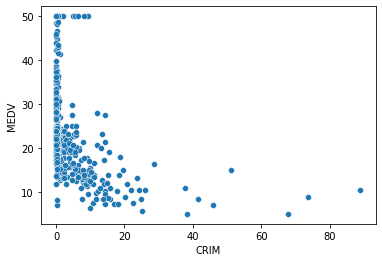

In [56]:
sns.scatterplot(data=df2,x='CRIM',y='MEDV');

# Proporcion de tierras residenciales en lotes grandes.

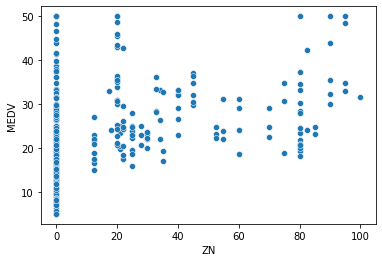

In [57]:
sns.scatterplot(data=df2,x='ZN',y='MEDV');

# Proporcion de tierras industriales por ciudad

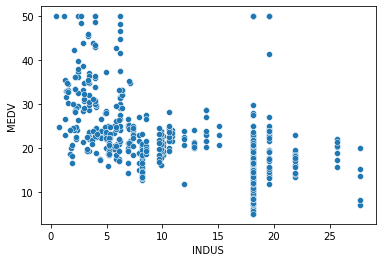

In [58]:
sns.scatterplot(data=df2,x='INDUS',y='MEDV');

### Aqui arriba sacamos una conclusion interesante: En zonas donde hay grandes centros comerciales, el precio promedio de la propiedad baja considerablemente. 
### Y viceversa, en zonas donde hay poca proporcion de centros comerciales, el precio promedio de la propiedad sube considerablemente

# Variable que indica si la propiedad da al rio

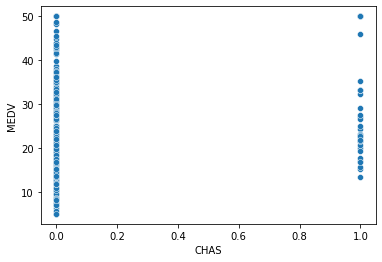

In [59]:
sns.scatterplot(data=df2,x='CHAS',y='MEDV');

### En el grafico de aqui arriba, notamos que existen muchos mas datos de casas que no dan al rio. 
### Pero tambien notamos, que en los datos de casas que SI dan al rio, su precio promedio sube considerablemente.

# Concentracion de acido nitrico. 

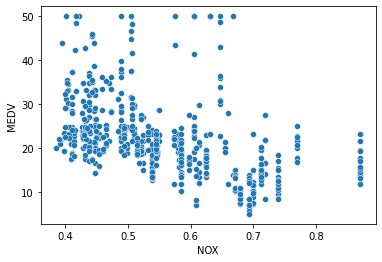

In [60]:
sns.scatterplot(data=df2,x='NOX',y='MEDV');

### En el grafico de arriba tambien notamos, que donde hay mayor concentracion de acido nitrico, el precio promedio de las viviendas disminuye considerablemente, y viceversa. 

# Numero promedio de habitaciones.

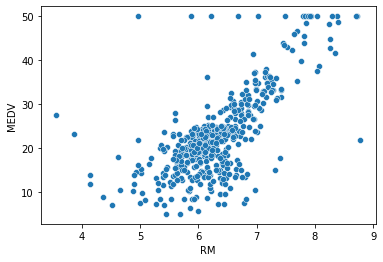

In [61]:
sns.scatterplot(data=df2,x='RM',y='MEDV');

### En el grafico de arriba, vemos que mientras mayor cantidad de habitaciones tiene la propiedad, el precio promedio aumenta considerablemente.

# Proporcion de unidades habitacionales construidas antes de 1940

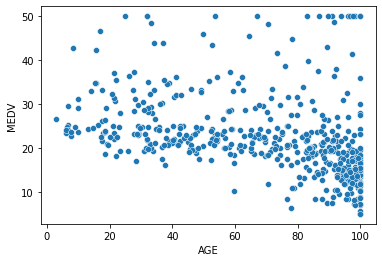

In [62]:
sns.scatterplot(data=df2,x='AGE',y='MEDV');

### En el grafico de arriba notamos que la mayoria de las casas fueron construidas antes de 1940, y que ese grupo tiene un precio promedio por propiedad menor a las que fueron construidas despues de esa fecha.

# Distancia a 5 centros de empleo de Boston.

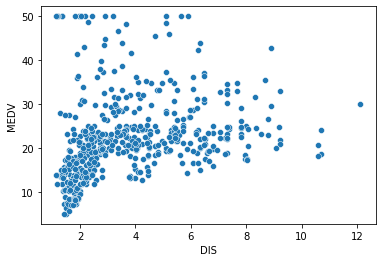

In [63]:
sns.scatterplot(data=df2,x='DIS',y='MEDV');

### En el grafico de arriba notamos que la mayoria de las propiedades del df se encuentran a una distancia corta de los centros de empleo, y esto hace que el precio promedio de la propiedad disminuya considerablemente. 
### Mientras que las propiedades que se encuentran a una distancia mayor de los centros de empleo tiene un precio promedio mayor.

# Indice de accesibilidad a grandes autopistas

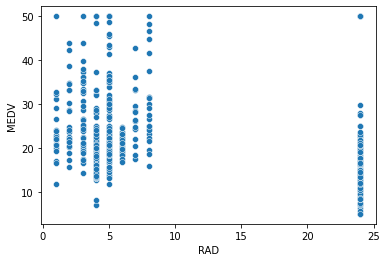

In [64]:
sns.scatterplot(data=df2,x='RAD',y='MEDV');

### En el grafico de arriba notamos que las propiedades que tienen un acceso cercano a una autopista, tiene un valor promedio de la propiedad menor. 
### Mientras que las propiedades con cierta lejania de las grandes autopistas tienen un valor promedio mayor.

# Impuestos a la propiedad cada 10.000 USD de valor del inmueble.

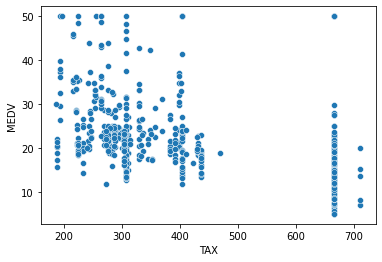

In [65]:
sns.scatterplot(data=df2,x='TAX',y='MEDV');

### En el grafico de arriba notamos que las propiedades con menos impuestos tienen valores promedio mayores. 
### Mientras que las propiedades que pagan gran cantidad de impuestos tienen valores promedio menores. 

# Ratio alumnos/docentes por ciudad

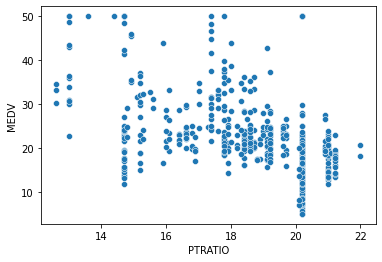

In [66]:
sns.scatterplot(data=df2,x='PTRATIO',y='MEDV');

# Proporcion de personas de raza negra

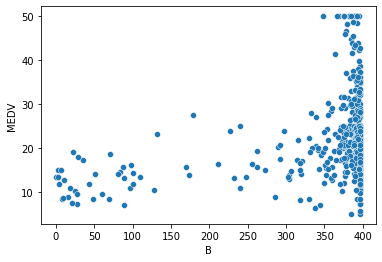

In [67]:
sns.scatterplot(data=df2,x='B',y='MEDV');

### En el grafico de arriba, donde se compara el precio promedio de la propiedad en relacion a zonas donde viven mas o menos cantidad de personas de raza negra o afroamericana; podemos notar que esta variable no afecta al precio promedio de la propiedad. POR SUERTE

# Porcentaje de poblacion de bajo status social. 

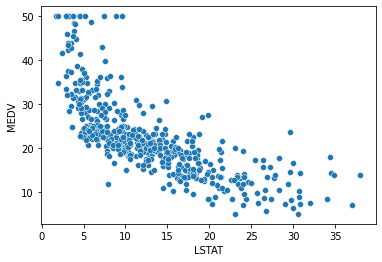

In [68]:
sns.scatterplot(data=df2,x='LSTAT',y='MEDV');

### En el grafico de arriba, donde se compara el precio de la propiedad con el porcentaje de bajo estatus social de las personas de la zona. Notamos que mientras el estatus social es menor de las personas, el precio de las propiedades baja considerablemente. 
### Y aunque es una variable 'dura', tambien es una realidad en cualquier parte del mundo donde la veamos. Sea en Boston, en Cordoba o en otras zonas.

2. A nuestro criterio los 3 atributos que más influyen en la predicción son los siguiente:
* LSTAT (Porcentaje de poblacion de bajo status social)
* RM (Numero promedio de habitaciones)
* PTRATIO (Ratio alumnos/docentes por ciudad)

3. Listado en orden importancia para la predicción, a priori:
  -  1. LSTAT
  -  2. RM
  -  3. PTRATIO
  -  4. NOX
  -  5. DIS
  -  6. TAX
  -  7. INDUS
  -  8. ZN
  -  9. B
  - 10. CRIM
  - 11. AGE
  - 12. RAD
  - 13. CHAS

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline

Train set Mean squared error: 36.52


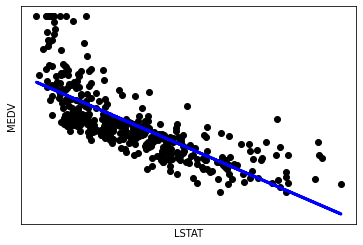

In [70]:
feature = 'LSTAT'  # selecciono el atributo LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

regr = linear_model.LinearRegression()

regr.fit(X_train_f, y_train)

y_pred = regr.predict(X_train_f)

print("Train set Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

plt.scatter(X_train_f, y_train, color="black")
plt.plot(X_train_f, y_pred, color="blue", linewidth=3)

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.xticks(())
plt.yticks(())

plt.show()

Test set Mean squared error: 46.34


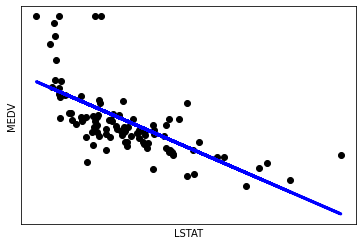

In [71]:
feature = 'LSTAT'  # selecciono el atributo LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

regr = linear_model.LinearRegression()

regr.fit(X_train_f, y_train)

y_pred = regr.predict(X_test_f)

print("Test set Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

plt.scatter(X_test_f, y_test, color="black")
plt.plot(X_test_f, y_pred, color="blue", linewidth=3)

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.xticks(())
plt.yticks(())

plt.show()

### En el modelo de arriba, basicamente aplicamos nuestro primer modelo de machine learning de la diplomatura!
### Y como vemos fueron tan solo unas muy pocas lineas de codigo para aplicar el modelo. Pero solo usamos dos variables: LSTAT (que indica el porcentaje de bajo status social de la zona) y MEDV (nuestro target, donde dice el precio medio de las viviendas). 
### Llamamos la funcion, la entrenamos y ya luego predecimos con los datos de test. 
### Nos dio un MSE de 46.34. El MSE no es mas que la suma de los residuos al cuadrado (los residuos son la distancia entre cada punto negro del grafico, hasta la linea azul; y es al cuadrado para que todos los valores nos queden positivos), divididos por el numero total de observaciones.
### El numero que nos dio el MSE (46.34) no dice mucho por si mismo. Tan solo es un numero, luego debemos compararlo con otros algoritmos y sus MSE; y a su vez puede ser un poco confuso; por lo que siempre recomiendo poder usar R al cuadrado para medir y comparar diferentes modelos; ya que el MSE puede cambiar drasticamente dependiendo de la escala de los datos.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [73]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = linear_model.LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [74]:
train_errors, test_errors

([85.1437202235075,
  36.52396640695966,
  28.18917233416823,
  26.78484649674975,
  25.84943285886594,
  25.034962537749603,
  25.014028004243542,
  25.01353497094333,
  24.84582298356287,
  24.825939935649917],
 [81.58231743908232,
  46.336305360025946,
  38.8468686617073,
  37.224242268440385,
  34.70486859830834,
  34.834708181336396,
  34.32620655264876,
  34.26108257555098,
  36.41528535962148,
  34.91600456401141])

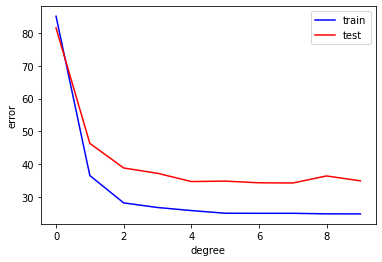

In [75]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

### En el grafico de arriba vemos que con tan solo usar una funcion polinomial de grado 3, ya el resultado mejora mucho. Luego de 4 a 8 hay ciertas mejoras pero no significativamente. 
### Y para no complejizar la ecucacion decidimos elegir una regresion polinomial de grado 3.

In [76]:
# 4. Reconstruir mejor modelo acá y graficar.
degree = 3
model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
model.fit(X_train_f, y_train);

In [77]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

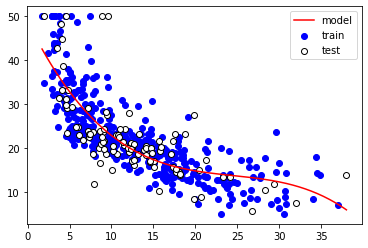

In [78]:
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

### En el grafico de arriba vemos como ahora nuestra regresion polinomial de grado 3 se adapta mucho mejor a los datos que una simple regresion lineal (que una regresion lineal no es mas que una regresion monomial, osea de grado 1). 

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [79]:
# 1. Se seleccionan RM y LSTAT
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape, y_train.shape, y_test.shape

((404, 2), (102, 2), (404,), (102,))

In [80]:
# 2. Entrenamiento, prediccion y evaluación en train y test
train_errors = []
test_errors = []
degrees = range(1,7)
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

Min Test Error: 28.14497186312392
Train Error: 18.659453833139377


In [81]:
train_errors, test_errors

([28.790276482053436,
  18.659453833139377,
  17.077754022370744,
  14.188503706315503,
  12.905613730167664,
  12.3521560151548],
 [37.383105638779945,
  28.14497186312392,
  28.567166435382816,
  33.99923338615729,
  34.2014052676771,
  34.92501288121473])

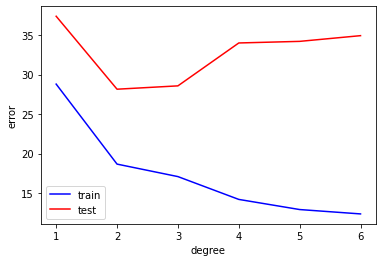

In [82]:
# El error más bajo en error cuadrático es la especificación con polinomio de grado 2
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

### En el grafico de arriba vemos que usando dos features en vez de uno podemos mejorar nuestro MSE, con una regresion polinomial de grado 2 ya nos es suficiente para tener un MSE mejor a 30. 

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [83]:
##EJERCICIO 6 CON TODAS LAS FEATURES##
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'CRIM')  | (boston['feature_names'] == 'ZN') | (boston['feature_names'] == 'INDUS') | (boston['feature_names'] == 'NOX') | (boston['feature_names'] == 'AGE') | (boston['feature_names'] == 'DIS') | (boston['feature_names'] == 'RAD') | (boston['feature_names'] == 'TAX') | (boston['feature_names'] == 'PTRATIO') | (boston['feature_names'] == 'B') | (boston['feature_names'] == 'CHAS')
X_train_ft = X_train[:, selector]
X_test_ft = X_test[:, selector]
X_train_ft.shape, X_test_ft.shape, y_train.shape, y_test.shape


((404, 13), (102, 13), (404,), (102,))

In [84]:
# 2. Resolver acá.
train_errors = []
test_errors = []
degrees = range(1,9)
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X_train_ft, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_ft)
    y_test_pred = model.predict(X_test_ft)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

##NOTAR QUE MEJORA EL ERROR CUADRÁTICO MEDIO DE LA PREDICCIÓN FUERA DE MUESTRA!!!##

Min Test Error: 25.215797430882063
Train Error: 6.3101561271654


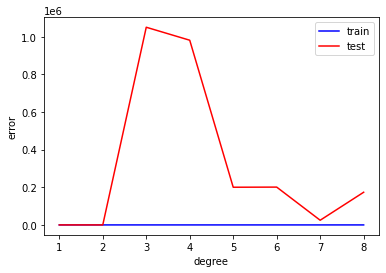

In [85]:
# EN QUE POLINOMIO DE LAS XS SE MINIMIZA EL ERROR EN TEST?##
##EN EL GRADO 1 O 2 ##
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [86]:
## 7 EVALUAR REGRESIONES CON RIDGE (DISTINTOS VALORES DE ALFA QUE MINIMIZAN EL ERROR)
## AUTORIA DEL GRUPO 6##
from sklearn.linear_model import Ridge
Alpha=0.2
degree = 2
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=Alpha))
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
   
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')



Train error: 4.511095
Test error: 33.705832


In [87]:
train_errors = []
test_errors = []
#alphas=np.logspace(0,1,10)
alphas = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
for alpha in alphas:
    # train:
    model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=alpha))
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

Min Test Error: 28.16558256463648
Train Error: 18.66435834175275


In [88]:
train_errors, test_errors

([18.66435834175275,
  18.67560508766568,
  18.689892844837562,
  18.705439226942218,
  18.721266461253407,
  18.736838744828553,
  18.7518696500078,
  18.766216041825967,
  18.779817899845444,
  18.79266337240732],
 [28.16558256463648,
  28.19090371913845,
  28.21774807305848,
  28.244498395556334,
  28.270345504014337,
  28.294908280576827,
  28.318036083650462,
  28.339702613281524,
  28.35994750611734,
  28.37884367057658])

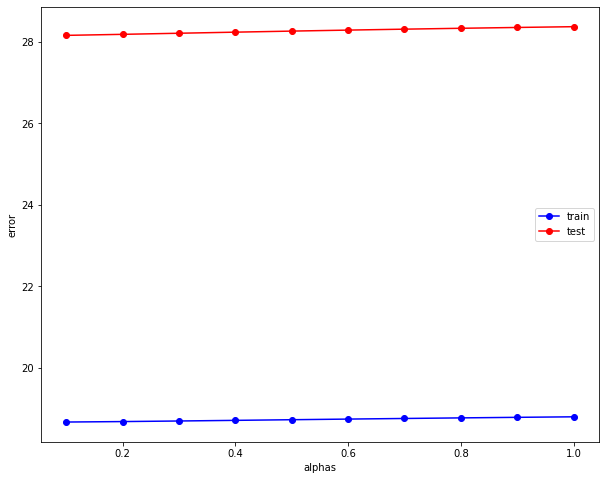

In [89]:
plt.figure(figsize=(10,8))
plt.plot(alphas, train_errors, color="blue", label="train", marker='o')
plt.plot(alphas, test_errors, color="red", label="test", marker='o')
plt.legend()
plt.xlabel("alphas")
plt.ylabel("error")
plt.show()